### PartialRankerDFG

Experiments with DFG based partial ranking methodology. In order to follow, please refer to Methodology 1 in the paper. 

#### Experiment 1

We create **4 objects**, each with **20 measurement values** sampled from four different normal distributions that are **not** well-separated; i.e., in this case, **t2** overlaps with all the other objects.

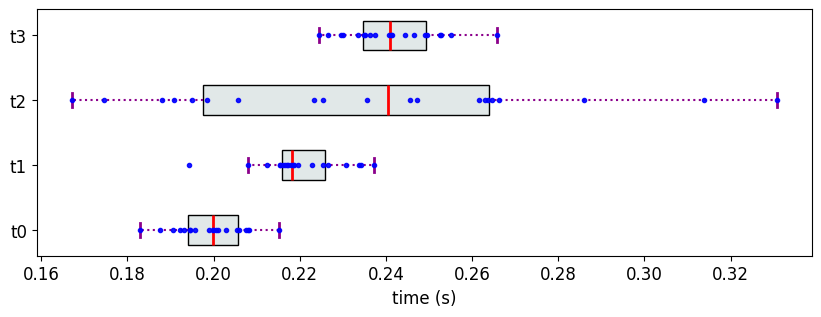

In [35]:
from partial_ranker import MeasurementsSimulator, MeasurementsVisualizer

M3 = {}
M3['t0']  = [0.2,0.01] #[mean, std]
M3['t1']  = [0.22,0.01]
M3['t2']  = [0.23,0.05]
M3['t3']  = [0.24,0.01]

ms = MeasurementsSimulator(M3,seed=1459)
ms.measure(reps=20)
measurements = ms.get_measurements()

mv = MeasurementsVisualizer(measurements)
fig = mv.show_measurements_boxplots(scale=0.8)

**The Partial Ranks according to Methodology 1**

In [38]:
from partial_ranker import QuantileComparer, Method,PartialRanker

cm = QuantileComparer(measurements)
cm.compute_quantiles(q_max=75, q_min=25)
cm.compare()
pr = PartialRanker(cm)
pr.compute_ranks(Method.DFG)
pr.get_ranks()

{0: ['t0', 't2'], 1: ['t1'], 2: ['t3']}

**The transitively reduced and sparse dependency graph (H)**

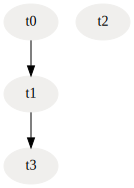

In [21]:
pr.get_dfg().visualize()

For this data, **PartialRankerMin** would assign all the objects to the same rank despite the samples originating from different normal distributions, which is not ideal for cases where we want to discriminate among the objects.  

#### Experiment 2

We create **10 objects**, each with **3 measurement values** sampled from 2 different normal distributions that **are well-separated**.

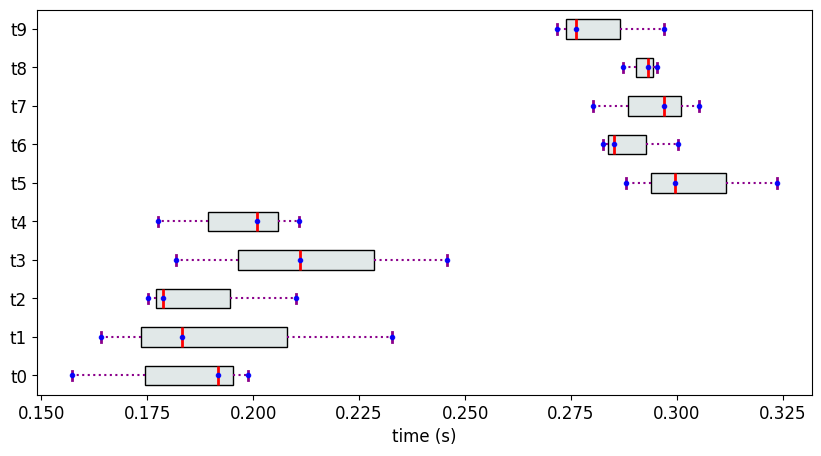

In [30]:
n1 = [0.2, 0.02]
n2 = [0.3,0.02]
M4 = {}

for i in range(5):
    M4['t{}'.format(i)] = n1

for i in range(5,10):
    M4['t{}'.format(i)] = n2

ms = MeasurementsSimulator(M4,seed=2)
ms.measure(reps=3)
measurements = ms.get_measurements()

mv = MeasurementsVisualizer(measurements)
fig = mv.show_measurements_boxplots(scale=0.5)

**The Partial Ranks according to Methodology 1 and the dependency graph H**

In [33]:
cm = QuantileComparer(measurements)
cm.compute_quantiles(q_max=75, q_min=25)
cm.compare()
pr = PartialRanker(cm)
pr.compute_ranks(Method.DFG)
pr.get_ranks()

{0: ['t0', 't1', 't2', 't4'],
 1: ['t3'],
 3: ['t5', 't7', 't8'],
 2: ['t6', 't9']}

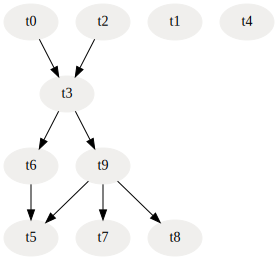

In [34]:
pr.get_dfg().visualize()

Despite the samples originating from two well-separated distribution, we find a total of 4 ranks. Therefore, in cases where the distributions are expected to be well separated, but there are too few measurements to capture the actual quantile values, it is recommended to use **PartialRankerDFGReduced** or **PartialRankerMin**.